In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('/Users/nguyenphanthaonguyen/Downloads/Apple.csv', header=0, parse_dates=[0], index_col=0)

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-12-12  42.599998  42.980000  42.255001  42.275002  40.576008  142510800
2018-12-13  42.622501  43.142502  42.387501  42.737499  41.019917  127594400
2018-12-14  42.250000  42.270000  41.320000  41.369999  39.707371  162814800
2018-12-17  41.362499  42.087502  40.682499  40.985001  39.337845  177151600
2018-12-18  41.345001  41.882500  41.097500  41.517502  39.848946  135366000


In [3]:
# 2.  chia train test theo tỉ lệ 7:3
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
# Split the data into training, testing
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [4]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])


from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)


model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3939.012, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3937.244, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3933.866, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3933.697, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3937.471, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3935.405, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3935.525, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3937.393, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3934.361, Time=0.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.555 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True)

In [6]:

y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))


In [7]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)


x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)


y_next_30_days = model.predict(n_periods=len(x_next_30_days))

print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[143.19921177 143.31387788 143.428544   143.54321011 143.65787623
 143.77254234 143.88720846 144.00187457 144.11654069 144.2312068
 144.34587292 144.46053903 144.57520515 144.68987126 144.80453738
 144.91920349 145.03386961 145.14853572 145.26320184 145.37786795
 145.49253407 145.60720018 145.7218663  145.83653241 145.95119853
 146.06586464 146.18053076 146.29519687 146.40986299 146.5245291 ]


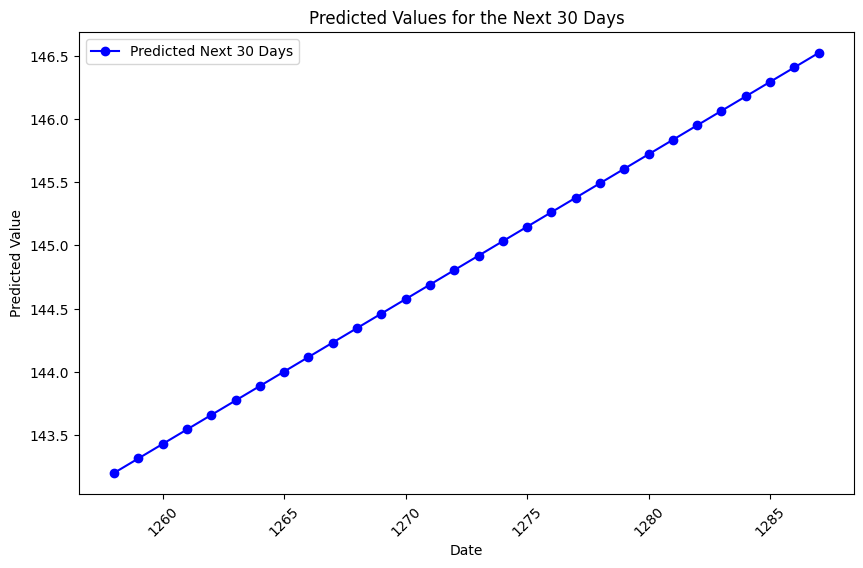

In [8]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [9]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 12.40972929003991
Testing MAPE: 0.06341407864559921
Testing MAE: 9.887792782082133


Testing RMSE: 12.40972929003991
Testing MAPE: 0.06341407864559921
Testing MAE: 9.887792782082133


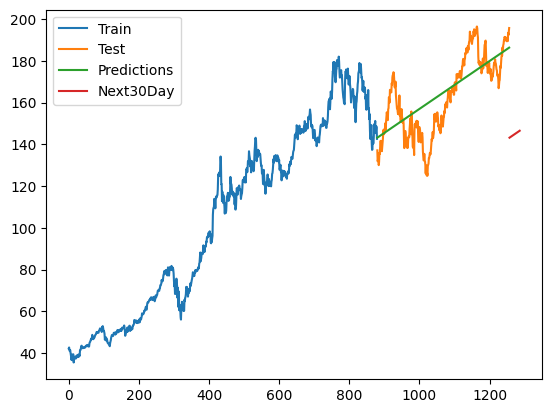

In [11]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [12]:
test_data.index

RangeIndex(start=880, stop=1257, step=1)